# OSEMN Exercises

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import random

## 1\. (done) Create a random list of number and then save it to a text file named "simple_data.txt"

In [3]:
d = random.random(size=100)
#print(d)

filename = "simple_data.txt"

with open(filename, mode = 'w') as f:
    for point in d:
        f.write(str(point) + '\n')

## 2\. (done) Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [17]:
matrix = np.array([[np.random.random() for _ in range(5)] for _ in range(5)])
#print(matrix)

# Manual way
filename = "simple_matrix.txt"
with open(filename, mode = 'w') as f:
    for row_idx in range(matrix.shape[0]):
        for col_idx in range(matrix.shape[1]):
            f.write(str(matrix[row_idx, col_idx]) + ',')
        f.write('\n')

#Numpy automatic way
filename = "simple_matrix_numpy.txt"
np.savetxt(fname= filename, X = matrix)

[[0.1860355  0.61307529 0.05353184 0.48756715 0.38687207]
 [0.83841886 0.05152655 0.39196464 0.37101173 0.28974222]
 [0.84502642 0.5843666  0.68215965 0.60974911 0.59934688]
 [0.8320256  0.83280161 0.2834097  0.28216093 0.54109529]
 [0.38339302 0.96138523 0.00962801 0.3743062  0.97296634]]


## 3\. (done) Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [41]:
input_filename = "simple_matrix_numpy.txt" # here separator = ' '
matrix = np.zeros((5,5))

# Load the matrix
row_idx =0
with open(input_filename, mode = 'r') as f:
    for line in f:
        # line is a str
        # numbers is a list of str
        numbers = line.rstrip('\n').split(sep= ' ')
        matrix[row_idx, :] = numbers
        row_idx += 1
print(matrix)

# Save the matrix as .csv
filename = "simple_matrix.csv"
with open(filename, mode = 'w') as f:
    for row_idx in range(matrix.shape[0]):
        for col_idx in range(matrix.shape[1]):
            f.write(str(matrix[row_idx, col_idx]) + ',')
        f.write('\n')

#There is no built in function for .csv saving in numpy. The alternative is to use Pandas

[[0.1860355  0.61307529 0.05353184 0.48756715 0.38687207]
 [0.83841886 0.05152655 0.39196464 0.37101173 0.28974222]
 [0.84502642 0.5843666  0.68215965 0.60974911 0.59934688]
 [0.8320256  0.83280161 0.2834097  0.28216093 0.54109529]
 [0.38339302 0.96138523 0.00962801 0.3743062  0.97296634]]


## 4\. - 5\. (done) Credit Cards Exercise

- Load the binary file named *credit_card.dat* and convert the data into the real credit-card number. 

    Consider that:

    - Each **line** correspond to a credit card number
    - Each character (also the space) is encoded with a string of 6 bit.
    - The newline character occupies 1 bit (try to believe)
    - The last 4 bit of the file are a padding

    **hint**: use the `chr()` function to convert a number to a char

- Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [44]:
# Methods for removing trailing strings

line = '0011011000110100111100110'
line_left = line.lstrip('01') # removes all combinations of 0 an 1: then removes the whole string!!
line_left
line_left_prefix = line.removeprefix('001')
line_left_prefix

# there are also rstrip() and remove.suffix()

'1011000110100111100110'

In [71]:
padding = "1010"
line = "1100111100001100101101101000001101111100111110001100001000001100011100101101001100011000001100011100001110001101001010"
clean_line = line.removesuffix(padding)
print(clean_line)
# check if line contains a valid credit card number
if clean_line:
    encoded_chars = [clean_line[i:(i + 6)] for i in range(0, len(clean_line), 6)]
    # decode the bit string into characters:
    # first step: convert the binary string into a decimal number;
    # second step: call chr() to retrieve the UTC8 encoded character
    decoded_chars = [chr(int(c, 2)) for c in encoded_chars]
print(encoded_chars)
print(decoded_chars)

110011110000110010110110100000110111110011111000110000100000110001110010110100110001100000110001110000111000110100
['110011', '110000', '110010', '110110', '100000', '110111', '110011', '111000', '110000', '100000', '110001', '110010', '110100', '110001', '100000', '110001', '110000', '111000', '110100']
['3', '0', '2', '6', ' ', '7', '3', '8', '0', ' ', '1', '2', '4', '1', ' ', '1', '0', '8', '4']


In [80]:
filename = "credit_card.dat"

# By manual inspection of the file, I see that:
# There are 50 credit cards -> 50+1 = 51 newline characters
# There is a padding: trailing chars at end of each line, also written in the last line
padding = '1010'

# Now i want to know how many characters form a credit card number
with open(filename, mode= 'r') as f:
    file_content = f.read()

lines_num = 51
total_bits = len(file_content) # total number of digits
# (\n = 1 bit)
valid_bits = total_bits - lines_num * len(padding) - (lines_num - 1) * 1
card_bits = valid_bits / 50
card_length = card_bits/6

print("total bits:", total_bits)
print("valid bits (excluded padding and newlines):", valid_bits)
print("card bits:", card_bits)
print("card length (spaces included):", card_length)


binary_cards = []
id = 0
with open(filename, mode= 'r') as f:
    for line in f:
        clean_line = line[: -5] # removes "1010\n" at end of string
        # tried with line.removesuffix("1010\n") and line.removesuffix("1010") but does nothing
        # check if line contains a valid credit card number
        if clean_line:
            encoded_chars = [clean_line[i:(i + 6)] for i in range(0, len(clean_line), 6)]
            # decode the bit string into characters:
            # first step: convert the binary string into a decimal number;
            # second step: call chr() to retrieve the UTC8 encoded character
            decoded_chars = [chr(int(c, 2)) for c in encoded_chars]
            binary_cards.append( ''.join(decoded_chars))
            id += 1


binary_cards
output_filename = "decoded_credit_cards.txt"
with open(output_filename, mode = 'w') as f:
    for card in binary_cards:
        f.write(card + '\n')
f.close()

total bits: 5954
valid bits (excluded padding and newlines): 5700
card bits: 114.0
card length (spaces included): 19.0


In [95]:
import json
data = json.load(open('user_data.json'))
#print (data) # type(data) = list

#for i in range(len(data)):
#    print(data[i]['FirstNameLastName'])

filtered_data = []   
for i in range(len(data)):
    if data[i]['CreditCardType'] == "American Express":
        filtered_data.append(data[i]) 
filtered_data

[{'ID': '2',
  'JobTitle': 'Investment  Advisor',
  'EmailAddress': 'Clint_Thorpe5003@bulaffy.com',
  'FirstNameLastName': 'Clint Thorpe',
  'CreditCard': '7083-8766-0251-2345',
  'CreditCardType': 'American Express'},
 {'ID': '12',
  'JobTitle': 'Retail Trainee',
  'EmailAddress': 'Phillip_Carpenter9505@famism.biz',
  'FirstNameLastName': 'Phillip Carpenter',
  'CreditCard': '3657-0088-0820-5247',
  'CreditCardType': 'American Express'},
 {'ID': '28',
  'JobTitle': 'Project Manager',
  'EmailAddress': 'Russel_Graves1378@extex.org',
  'FirstNameLastName': 'Russel Graves',
  'CreditCard': '6718-4818-8011-6024',
  'CreditCardType': 'American Express'},
 {'ID': '39',
  'JobTitle': 'Stockbroker',
  'EmailAddress': 'Leanne_Newton1268@typill.biz',
  'FirstNameLastName': 'Leanne Newton',
  'CreditCard': '5438-0816-4166-4847',
  'CreditCardType': 'American Express'},
 {'ID': '57',
  'JobTitle': 'Budget Analyst',
  'EmailAddress': 'Tony_Giles1960@iatim.tech',
  'FirstNameLastName': 'Tony Giles'

In [108]:
columns = list(filtered_data[0].keys())
columns
values = list(filtered_data[0].values())
values

output_filename = "american_express_user_data.csv"
with open(output_filename, mode = "w") as f:
    #write header
    for col in columns[:-1]:
        f.write(col + ", ")
    f.write(columns[-1] + "\n")
    # write users data
    for user_idx in range(len(filtered_data)):
        values = list(filtered_data[user_idx].values())
        for val in values[:-1]:
            f.write(val + ", ")
        f.write(val[-1] + '\n')
f.close()

## 6\. (done)

Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


In [ ]:
# Method 1: download manually, move into pwd, initialize pandas df from .csv
! cp /Users/miriamzara/Downloads/mushrooms_categorized.csv /Users/miriamzara/LaboratoryOfComputationalPhysics_Y7/05_Lab_OSEMN/mushrooms_categorized.csv 

In [3]:
import pandas as pd
df = pd.read_csv("mushrooms_categorized.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<Axes: ylabel='Frequency'>

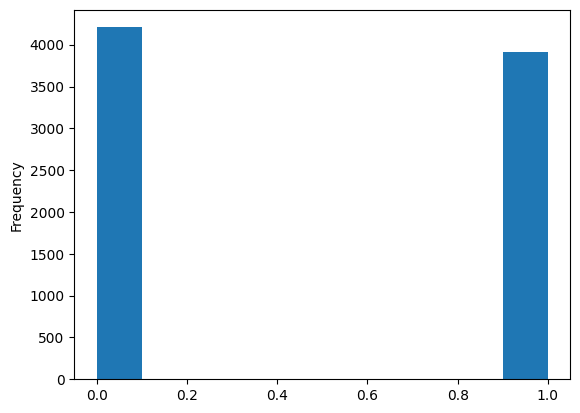

In [4]:
df["class"].plot(kind= "hist") # pandas DataFrame.plot() is just a wrapper around pyplot.plot()

I see that the field "class" is actually binary, so the above plot is not the best suited one. I will put in a little more effor to realize a histo plot with only two bins.

Text(0.5, 0, 'class')

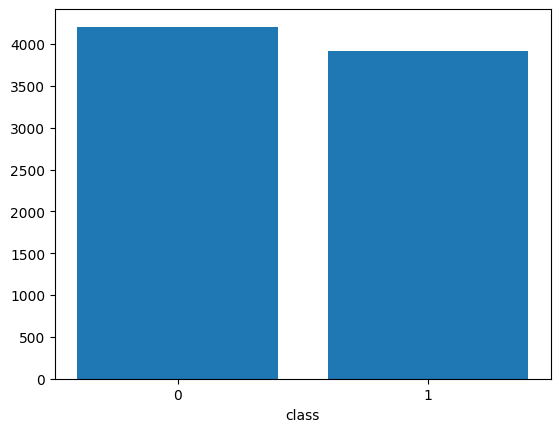

In [15]:
import matplotlib.pyplot as plt
import numpy as np
counts, bins = np.histogram(df["class"], bins = 2)
centers = [0.25, 0.75]
plt.bar(x = centers, height= counts, width = 0.4)
plt.xticks(ticks= centers, labels= ["0", "1"])
plt.xlabel("class")

## 7\. (done)

Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [17]:
! cp /Users/miriamzara/Downloads/regression_generated.csv regression_generated.cscv

In [20]:
df = pd.read_csv("regression_generated.cscv")
df.head()
reduced_df = df[['features_1', 'features_2', 'features_3']].copy()

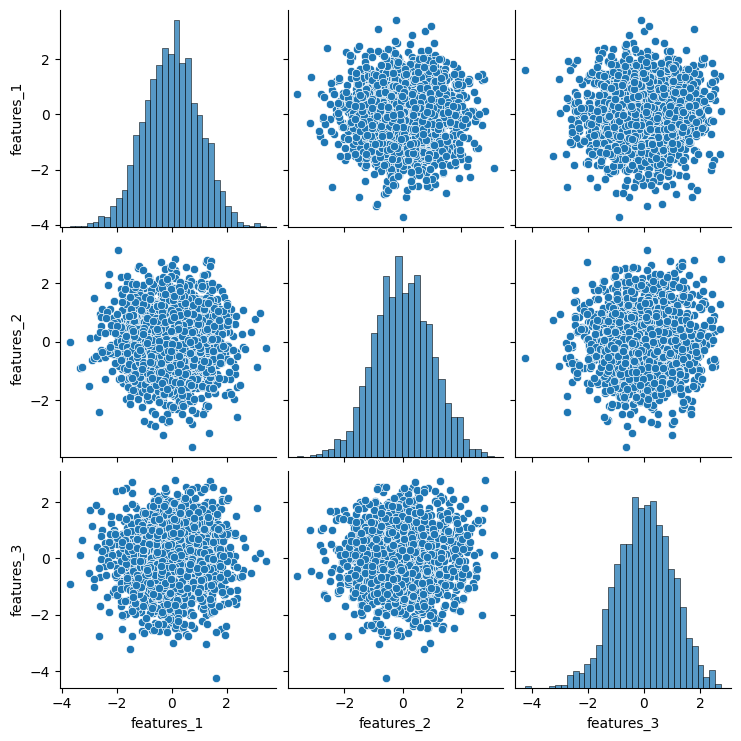

In [23]:
import seaborn as sns
sns.pairplot(reduced_df)

There does not seem to be any visible correlation

## 8\.  (done)
Load the same file of point 6, and convert the file to json with Pandas.

In [29]:
df = pd.read_csv("regression_generated.cscv")
df.to_json(path_or_buf= "regression_generated.json", orient= 'index') # various options for formatting

In [30]:
new_df = pd.read_json("regression_generated.json", orient= 'index')
new_df.head()

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
